In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titan1c/Titanic.csv


In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('/kaggle/input/titan1c/Titanic.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df

In [9]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


В некоторых строках не заполнен Embarked, я заменил его наиболее популярным.

In [ ]:
pd.options.mode.copy_on_write = True

In [19]:
MaxPassEmbarked = df.groupby('Embarked').count()['PassengerId']
df.Embarked[df.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

/tmp/ipykernel_33/3154323189.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Embarked[df.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]
/tmp/ipykernel_33/3154323189.py:2: SettingWithCopyWarning

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Данных о номере каюты практически нет, и я позволю сделатьдопущение и не учитывать этот столбик в анализе, хоть номер каюты и может оказаться одним 
из решающих факторов при спасении, по скольку может находится практически рядом со спуском на воду, но нет никакой гарантии, что пассажир в момент
крушения находится в своей каюте.

In [18]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import numpy as np

/tmp/ipykernel_33/3088473565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Age)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


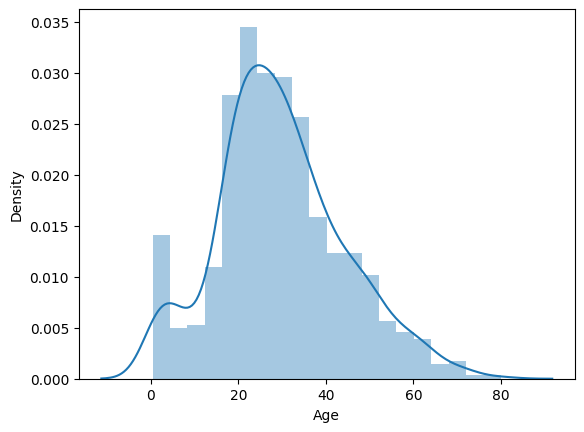

In [14]:
ax = sns.distplot(df.Age)

Медианное значение возраста составило около 28 лет, но, возможно, при обработке данных возникли бы неточности, далее, с помощью материалов с лабораторных работ будут приведены графики, исследования заполненных значений возраста в соответствии с выживаемостью.

In [16]:
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipykernel_33/1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

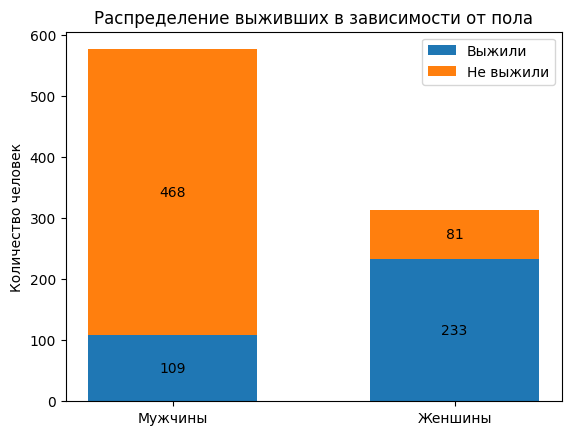

In [22]:
# Общее количество мужчин и женщин + количество выживших
males_total = len(df.loc[(df ['Sex'] == 'male')])
females_total = len(df.loc[ (df['Sex'] == 'female')])
males_survived = len(df.loc[((df['Sex'] == 'male') & (df[ 'Survived'] == 1))]) 
females_survived = len(df.loc[((df['Sex'] == 'female') & (df['Survived'] == 1))])
#Визуализация
survivors_counts = {
'Выжили': [males_survived, females_survived],
'He выжили': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom= np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Mужчины', 'Женшины'), count, width=0.6, label=key, bottom=bottom) 
    bottom += count
    ax.bar_label(p, label_type='center')
    ax.set_title('Распределение выживших в зависимости от пола')
    ax.set_ylabel('Количество человек')
ax.legend() 
plt.show()


Здесь представлена зависимость выживаемости только от пола пассажира, в соответствии с представленными данными мы можем сказать, что при видимом превосчходстве пассажиров мужского пола, выжить удалось не многим из них, в то время как большинству пассажиров женского пола удалось сохранить свою жизнь.

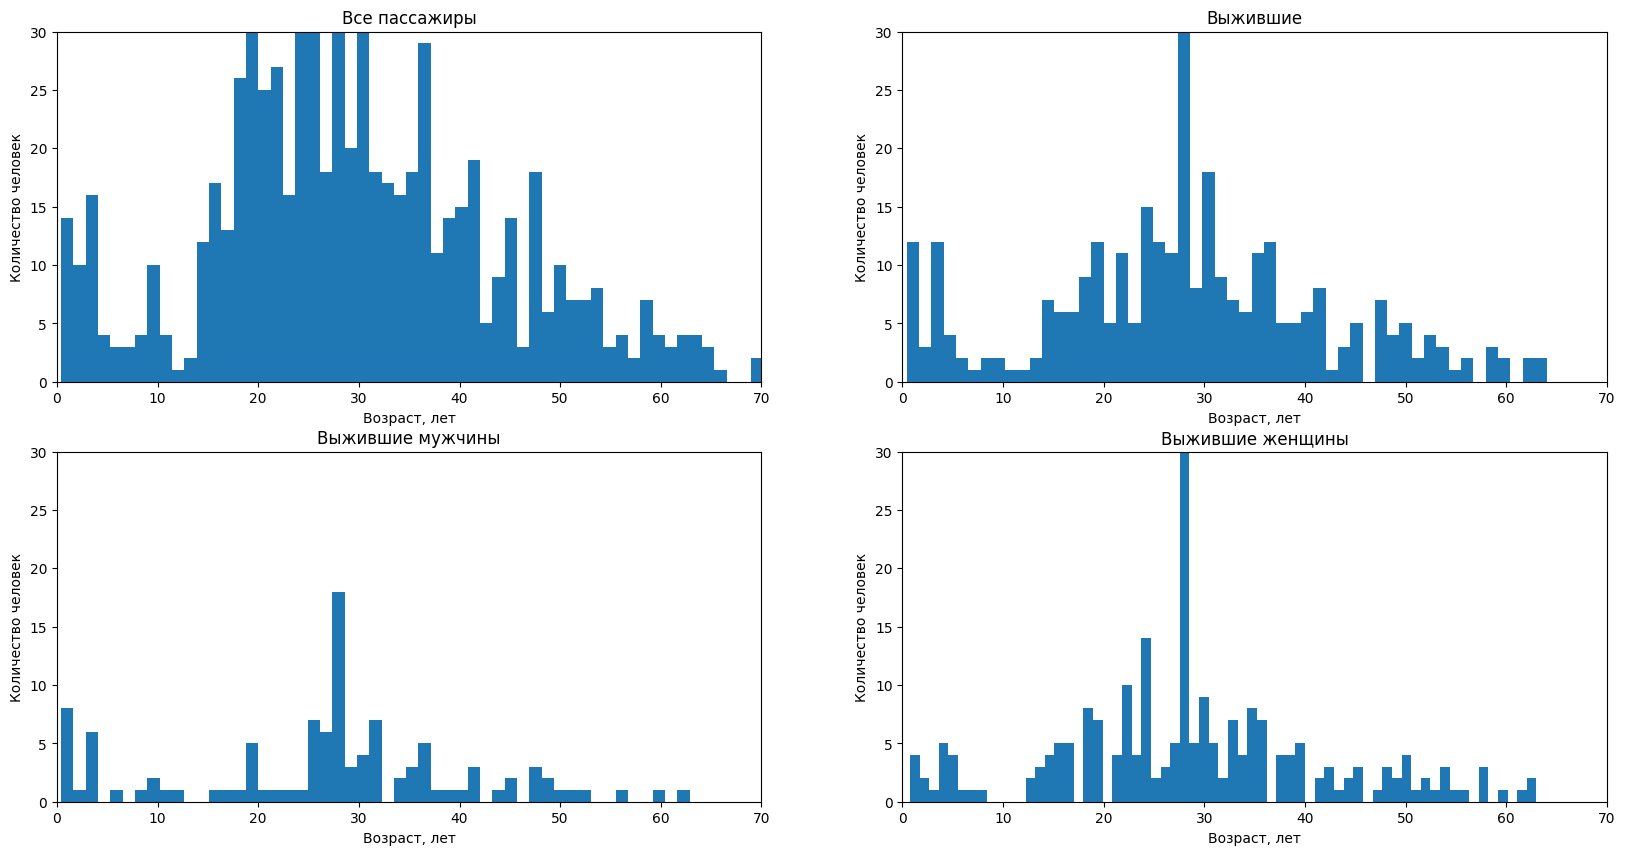

In [23]:
from collections import Counter

#Распределение списка пассажиров по отдельным группам 
survivors = df.loc[(df['Survived'] == 1)]
male_survivors = df.loc[((df['Sex'] == 'male') & (df[ 'Survived'] == 1))]
female_survivors = df.loc[((df['Sex'] == 'female') & (df['Survived'] == 1))]

#Число возрастов
num_of_ages = len(dict (Counter (survivors ['Age'])).keys())

#Визуализация
fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']] 
for i, surv in enumerate([[df, survivors], [male_survivors, female_survivors]]): 
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Boзpacт, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0,30)
        axs[i][j].set_xlim(0,70)
plt.show()

На двух первых графиках представлено количество пассажиров в соответствии с возрастом, и в каком случае выживаемость составила наибольший процент.
На нижних графиках представленна кореляция выживаемости и возраста пассажиров, исходя из данных мы можем сказать, что большинство из них женщины, ниже 25 лет, но так же есть множество выживших мужчин, ниже 10 лет соответственно.

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
cat_cols = df.select_dtypes(include=['object']).columns
label_encoder = {}

In [26]:
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le

In [ ]:
df

In [28]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
df.isnull().sum()

In [29]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [30]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,81,1,26.0,0,0,8,30.0000,60,0


In [31]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Модель:**

Для модели была выбрана нейронная сеть, точно такая же, как в материале на лабораторной.

In [97]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential
from keras.layers import Dense


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)


# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test) 
print(f'Test Accuracy: {accuracy:.2f}')



Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5409 - loss: 0.6928 - val_accuracy: 0.7762 - val_loss: 0.5810
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7281 - loss: 0.5914 - val_accuracy: 0.8252 - val_loss: 0.5063
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7871 - loss: 0.5296 - val_accuracy: 0.8601 - val_loss: 0.4528
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8237 - loss: 0.4744 - val_accuracy: 0.8462 - val_loss: 0.4140
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8100 - loss: 0.4628 - val_accuracy: 0.8531 - val_loss: 0.3978
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7984 - loss: 0.4488 - val_accuracy: 0.8392 - val_loss: 0.3862
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8329 - loss: 0.3993 - val_accuracy: 0.8462 - val_loss: 0.3816
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8334 - loss: 0.4081 - val_accuracy: 0.8531 - val_loss: 0.3794
Ep

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8384 - loss: 0.4003 - val_accuracy: 0.8462 - val_loss: 0.4030
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8167 - loss: 0.4240 - val_accuracy: 0.8322 - val_loss: 0.4024
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8379 - loss: 0.3732 - val_accuracy: 0.8322 - val_loss: 0.4045
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8639 - loss: 0.3499 - val_accuracy: 0.8462 - val_loss: 0.4031
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8753 - loss: 0.3441 - val_accuracy: 0.8322 - val_loss: 0.4035
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8616 - loss: 0.3588 - val_accuracy: 0.8252 - val_loss: 0.4047
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8548 - loss: 0.3615 - val_accuracy: 0.8252 - val_loss: 0.4043
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8680 - loss: 0.3492 - val_accuracy: 0.8252 - val_loss:

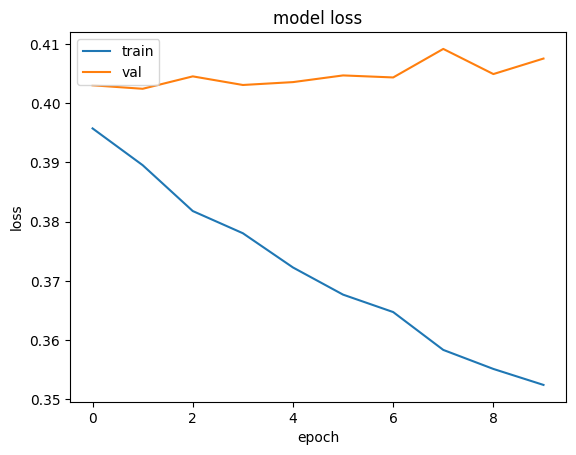

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split =0.2) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Видим, что на тренировочной выборке, что loss падает, а на валидации график нестабилен, это говорит о том, что модель не хорошо обучилась.
Следом я решил поменять линейные модели и число эпох.

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential
from keras.layers import Dense

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.4)

#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test) 
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6202 - loss: 6.1217 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6159 - loss: 6.1918 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6171 - loss: 6.1716 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6205 - loss: 6.1163 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5865 - loss: 6.6654 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6170 - loss: 6.1739 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6331 - loss: 5.9133 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6336 - loss: 5.9051 - val_accuracy: 0.6246 - val_loss: 6.0514
Ep

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6368 - loss: 5.8543 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6043 - loss: 6.3783 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6154 - loss: 6.1987 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6009 - loss: 6.4334 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5983 - loss: 6.4751 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6120 - loss: 6.2538 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6285 - loss: 5.9884 - val_accuracy: 0.6246 - val_loss: 6.0514
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6109 - loss: 6.2714 - val_accuracy: 0.6246 - val_loss

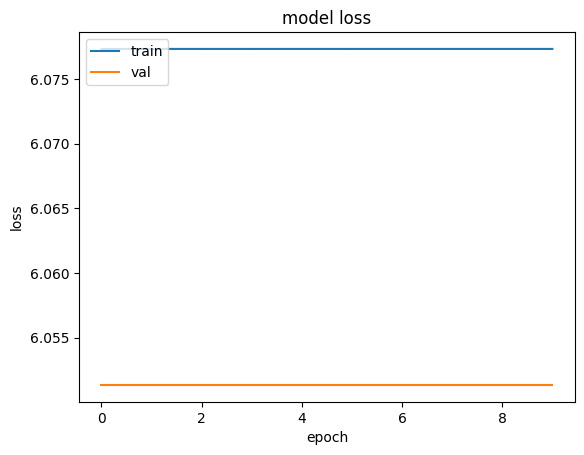

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split =0.4) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Результаты лишь ухудшились, но после нескольких опытов я разбил обучение на 4 эпохи и, как мне кажется самое важное, поднял параметр validation_split до 0.4, что сократило выборку результатов для обучения.

In [91]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential
from keras.layers import Dense


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)


# Create the neural network model
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.4)


#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test) 
print(f'Test Accuracy: {accuracy:.2f}')



Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6160 - loss: 0.6692 - val_accuracy: 0.6246 - val_loss: 0.6610
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6379 - loss: 0.6479 - val_accuracy: 0.6246 - val_loss: 0.6491
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6258 - loss: 0.6443 - val_accuracy: 0.6246 - val_loss: 0.6385
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6207 - loss: 0.6369 - val_accuracy: 0.6246 - val_loss: 0.6275
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6170 - loss: 0.6278 - val_accuracy: 0.6421 - val_loss: 0.6137
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6382 - loss: 0.6084 - val_accuracy: 0.6632 - val_loss: 0.5970
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6807 - loss: 0.5882 - val_accuracy: 0.7053 - val_loss: 0.5780
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7362 - loss: 0.5528 - val_accuracy: 0.7123 - val_loss: 0.5602
Ep

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7874 - loss: 0.5222 - val_accuracy: 0.7474 - val_loss: 0.5146
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7884 - loss: 0.4786 - val_accuracy: 0.7404 - val_loss: 0.5007
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7983 - loss: 0.4580 - val_accuracy: 0.7544 - val_loss: 0.4898
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7624 - loss: 0.4917 - val_accuracy: 0.7579 - val_loss: 0.4835
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7736 - loss: 0.4768 - val_accuracy: 0.7614 - val_loss: 0.4768
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8191 - loss: 0.4091 - val_accuracy: 0.7649 - val_loss: 0.4712
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8318 - loss: 0.4108 - val_accuracy: 0.7684 - val_loss: 0.4675
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7660 - loss: 0.4804 - val_accuracy: 0.7719 - val_loss:

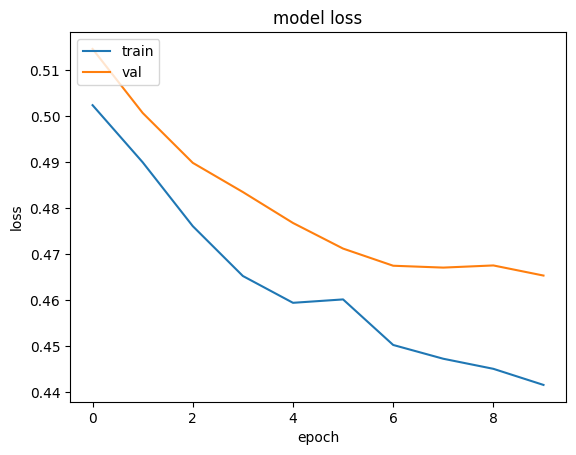

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split =0.4) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

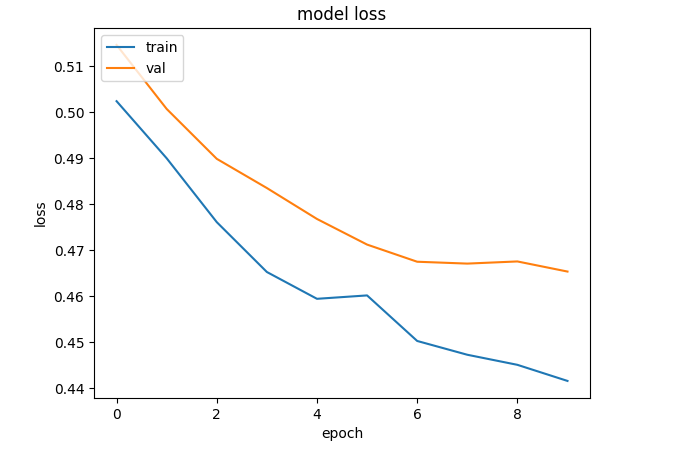

In [ ]:
Лучший результат, что мне удалось получить, где график валидации не скачет и не лежит на одной прямой.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6283 - loss: 0.6697 
Fold (fold + 1) Validation Accuracy: 0.63
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
 Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       187
           1       0.00      0.00      0.00       110

    accuracy                           0.63       297
   macro avg       0.31      0.50      0.39       297
weighted avg       0.40      0.63      0.49       297

Fold 3Confusion Matrix:
[[187   0]
 [110   0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


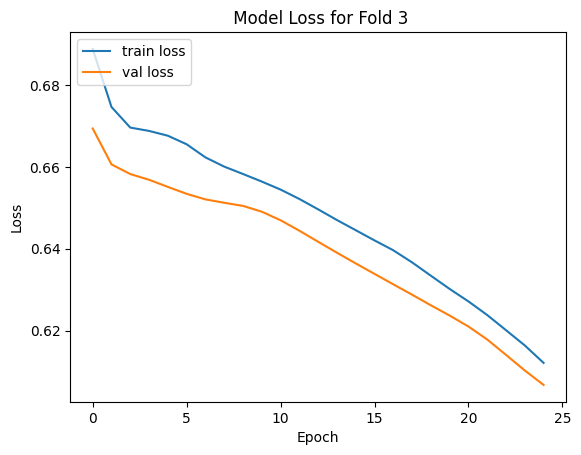

In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix 
import matplotlib.pyplot as plt

X = df.drop(columns=['Survived'])
y = df['Survived']

#Стандартизируем данные
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Настраиваем KFold для кросс-валидации
kf= KFold (n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate (kf.split(X_scaled)): 
    X_train, X_val = X_scaled [ train_index], X_scaled [val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model=Sequential()
    model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=500, batch_size=400, validation_data=(X_val, y_val), callbacks = [early_stopping], verbose=0)
# Оцениваем модель на валидационном наборе
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Fold (fold + 1) Validation Accuracy: {val_accuracy:.2f}')
# Предсказания на валидационном наборе
y_pred = (model.predict(X_val)>0.5).astype("int32")
# ВыBодим classification_report и confusion_matrix 
print(f' Fold {fold+1} Classification Report:') 
print(classification_report(y_val, y_pred))
print(f'Fold {fold + 1}Confusion Matrix:') 
print(confusion_matrix (y_val, y_pred))
#График обучения
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['val_loss'], label='val loss') 
plt.title(f' Model Loss for Fold {fold + 1}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend (loc='upper left')
plt.show()

**Заключение.**
В сравнении со всеми Fold'ами, на основе третьего, самого удачного в моем случае, модель, почему-то определила FP и FN равными нулю, боюсь, это связано с выбранным мною несовершенным способом обучения, а значения TN = 187, FN = 110, соответственно.
В итоге значение accuracy составило не больше 0.8, что указывает на несовершенство выбранного мною метода, а некоторые значения и вовсе оказались нулевыми.
f1-score в районе 0.75, что тоже является несовершенным.
Третий фолд оказался лучше двух предыдущих, в соответствии примененным мною методам, которые, в свою очередь, все равно привели к неточностям.
Работа оказалась довольно сложной и массивной, для первого раза, и вызвала немало затруднений в связи с незнанием языка Python, основ работы в Kaggle, и основных методов DS, возможно в дальнейшем все прояснится, благодаря лекциям, группы студентов находятся в неравных условиях, и, надеюсь, в дальнейшем удастся вернуться к данному соревнованию и выполнить его более достоверно и правильно.